In [1]:
from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re

import numpy as np
import pandas as pd

%matplotlib inline

import little_mallet_wrapper as lmw

<br><br>

# MALLET Path

Change the path below to the location of your local MALLET installation.

In [2]:
path_to_mallet = '/Users/mah343/Documents/packages/mallet-2.0.8/bin/mallet'  # CHANGE THIS TO YOUR MALLET PATH

<br><br>

# Load poetry dataset

Data is available here:  
https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset

In [3]:
# 'https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset/download'

In [4]:
poetry_path = '/Volumes/Maria\'s Black Passport/data/kaggle-poem-dataset/kaggle_poem_dataset.csv'  # CHANGE THIS TO YOUR DATASET PATH

In [5]:
poetry_df = pd.read_csv(poetry_path)
poetry_df.sample(5)

,Unnamed: 0,Author,Title,Poetry Foundation ID,Content
10511,10511,Adam Fitzgerald,Poem with Accidental Memory\n \n \n \n Laun...,56685,"That we go back to life one day, the next,\nSo..."
9807,9807,William E. Stafford,One Home\n \n \n \n Launch Audio in a New W...,42780,Mine was a Midwest home—you can keep your worl...
1214,1214,Anonymous,Barbara Allen,50273,"In Scarlet town, where I was born,\nThere was ..."
6154,6154,Michael Drayton,Idea 43: Why should your fair eyes with such s...,50278,Why should your fair eyes with such sovereign ...
14580,14580,S.J. Fowler,Violence on the Internet\n \n \n \n Launch ...,92656,"A circle.\nWhat was needed was a circuit,\nand..."


In [6]:
print(len(poetry_df.index))

15652


In [7]:
training_data = [lmw.process_string(t) for t in poetry_df['Content'].tolist()]
training_data = [d for d in training_data if d.strip()]

len(training_data)

15644

In [8]:
training_data[100]

'year twelve daughters turn gone measured pace tho varying mien twelve froward sedater adorn festival reckless attire snow left mountain top fresh flowers withered meadow fig prune hung wrinkling last apple glow amid freckled leaves weary oxen blinkt trodden corn twisted vine whose bunches stood empty crate creak ere long beneath carried home season twelve months gentle hamadryad true love thy mansion thy dim mansion wood blasted laid desolate none dared violate precincts none dared pluck moss beneath alone remain thine old thallinos sat mute solitary sadness strange tale rhaicos died whole echion related force could ever make look back upon oaks father said echion thou must weigh carefully steady hand enough although longer comes store wax burn day night upon hollow stone milk honey lie may gods may dead pleas thallinos bore thither morn lighted left first visited upon solemn day hamadryad oak rhodope acon one age one hope one trust graceful nymph whose fate sorrowed slender pale firs

In [9]:
authors = poetry_df['Author'].tolist()

len(authors)

15652

In [10]:
lmw.print_dataset_stats(training_data)

Number of Documents: 15644
Mean Number of Words: 136.7
Vocabulary Size: 100635


<br><br>

# Train topic model

Depending on the size of your dataset, training can take a while. For very large datasets, I recommending training outside of a notebook.

While training, you can observe progress by checking the terminal window from which you started Jupyter.

In [11]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = '/Users/mah343/Desktop/lmw-output' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

path_to_training_data           = output_directory_path + '/training.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.training'
path_to_model                   = output_directory_path + '/mallet.model.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)

In [12]:
lmw.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


In [18]:
lmw.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      num_topics)

Training topic model...
Complete


<br><br>

# Load the topics

In [13]:
topics = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keys.20')

for i, t in enumerate(topics):
    print(i, '\t', t[:10])

0 	 ['man', 'one', 'like', 'little', 'old', 'head', 'dog', 'back', 'boy', 'two']
1 	 ['get', 'say', 'like', 'got', 'back', 'says', 'want', 'know', 'good', 'home']
2 	 ['one', 'body', 'world', 'mind', 'life', 'self', 'human', 'form', 'time', 'without']
3 	 ['ond', 'swa', 'one', 'mid', 'onne', 'fter', 'dat', 'ofer', 'hie', 'les']
4 	 ['tree', 'green', 'like', 'leaves', 'trees', 'sun', 'white', 'grass', 'wind', 'rain']
5 	 ['NUM', 'hym', 'hit', 'ful', 'watz', 'hem', 'alle', 'bot', 'wyth', 'hir']
6 	 ['like', 'black', 'way', 'music', 'song', 'blue', 'dance', 'sing', 'new', 'sound']
7 	 ['light', 'night', 'like', 'back', 'one', 'room', 'window', 'door', 'house', 'dark']
8 	 ['water', 'sea', 'like', 'sky', 'river', 'wind', 'black', 'light', 'blue', 'sand']
9 	 ['like', 'upon', 'night', 'day', 'heart', 'yet', 'light', 'eyes', 'far', 'round']
10 	 ['love', 'heart', 'life', 'death', 'let', 'one', 'eyes', 'god', 'world', 'know']
11 	 ['NUM', 'poem', 'poetry', 'new', 'book', 'name', 'read', 'poet

In [14]:
topic_distributions = lmw.load_topic_distributions(output_directory_path + '/mallet.topic_distributions.20')

len(topic_distributions), len(topic_distributions[0])

(15644, 20)

In [15]:
assert(len(topic_distributions) == len(training_data))

In [16]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, 10):
    print(round(p, 4), d)
    print()

0.6976 twelfth night come away come away death sad cypress let laid fly away fly away breath slain fair cruel maid shroud white stuck yew prepare part death one true share flower flower sweet black coffin let strown friend friend greet poor corpse bones shall thrown thousand thousand sighs save lay sad true lover never find grave weep

0.6932 wine comes mouth love comes eye shall know truth grow old die lift glass mouth look sigh

0.6638 melt waxen man sister helen day third since began time long yet time ran little brother mother mary mother three days day hell heaven done work aright sister helen let play said might still play night little brother mother mary mother third night night hell heaven said must melt ere vesper bell sister helen molten well even nay peace cannot tell little brother mother mary mother hell heaven waxen knave plump day sister helen like dead folk dropp away nay dead say little brother mother mary mother dead hell heaven see see sunken pile wood sister helen s

<br><br>

# Plot topics by category

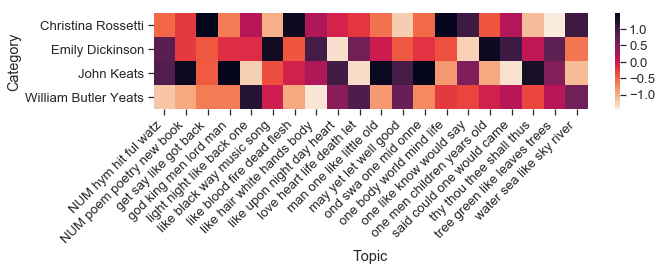

In [26]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

lmw.plot_categories_by_topics_heatmap(authors,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim=(10,4))

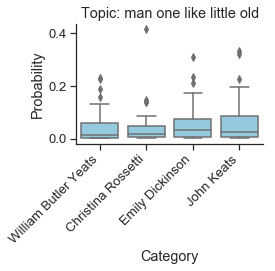

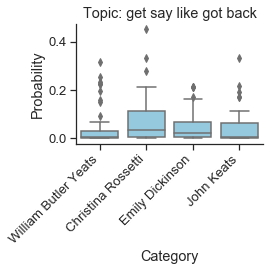

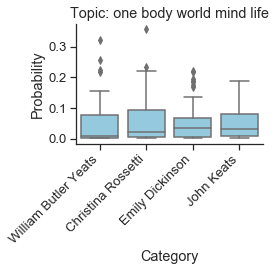

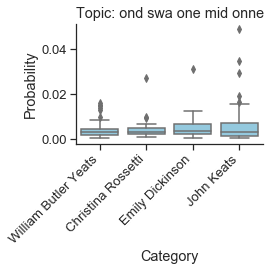

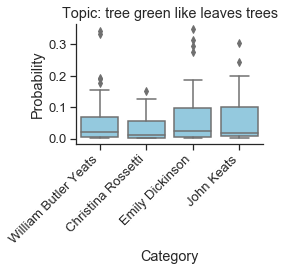

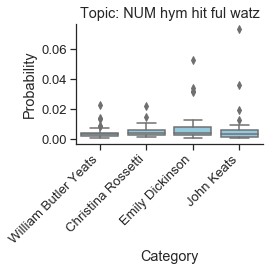

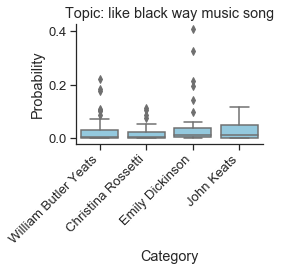

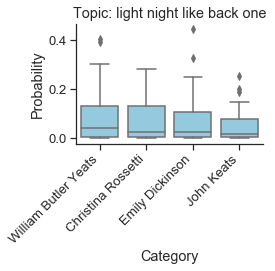

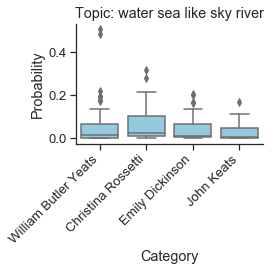

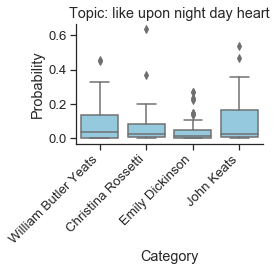

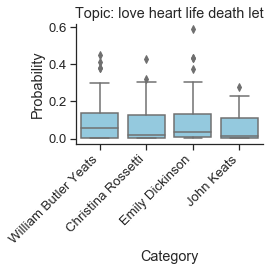

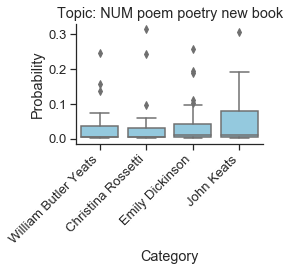

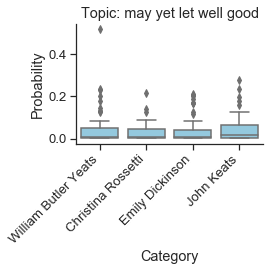

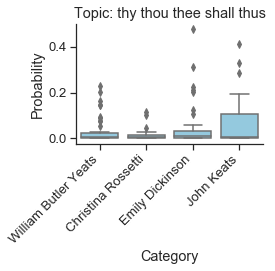

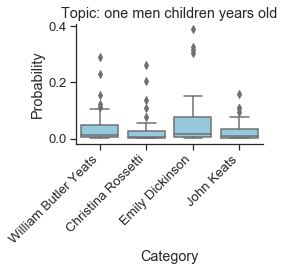

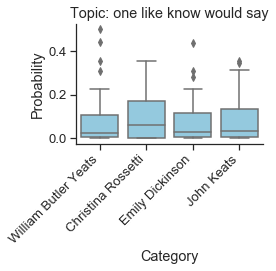

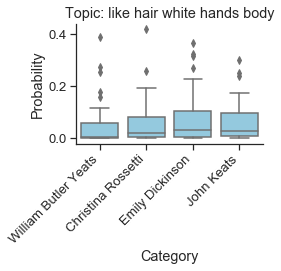

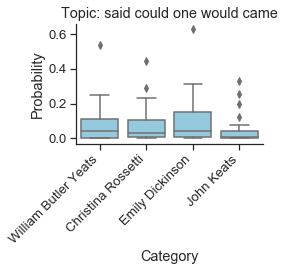

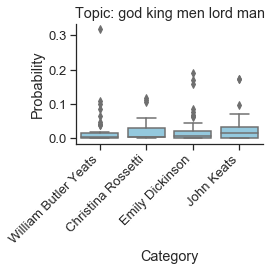

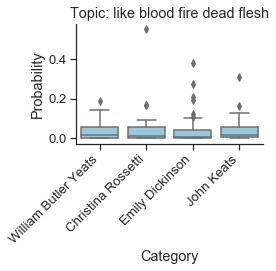

In [27]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

for _topic_index in range(0, len(topics)):
    
    lmw.plot_categories_by_topic_boxplots(authors,
                                          topic_distributions,
                                          topics, 
                                          _topic_index,
                                          output_path=output_directory_path + '/boxplot.' + str(_topic_index) + '.pdf',
                                          target_labels=target_labels,
                                          dim=(4,4))

<br><br>

# Plot topics over time

In [17]:
divided_documents, document_ids, times = lmw.divide_training_data(training_data,
                                                                  num_chunks=10)

len(divided_documents), len(document_ids), len(times)

(156440, 156440, 156440)

In [18]:
path_to_divided_training_data           = output_directory_path + '/training.split.txt'
path_to_divided_formatted_training_data = output_directory_path + '/mallet.split.training'
path_to_divided_topic_distributions     = output_directory_path + '/mallet.split.topic_distributions.' + str(num_topics)

In [19]:
lmw.import_data(path_to_mallet,
                path_to_divided_training_data,
                path_to_divided_formatted_training_data,
                divided_documents,
                path_to_formatted_training_data)

Importing data using pipe...
Complete


In [61]:
lmw.infer_topics(path_to_mallet,
                 path_to_model,
                 path_to_divided_formatted_training_data,
                 path_to_divided_topic_distributions)

Inferring topics using pre-trained model...
Complete


In [20]:
topic_distributions = lmw.load_topic_distributions(path_to_divided_topic_distributions)

len(topic_distributions), len(topic_distributions[2])

(156440, 20)

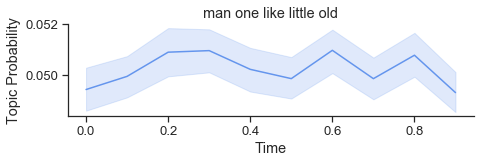

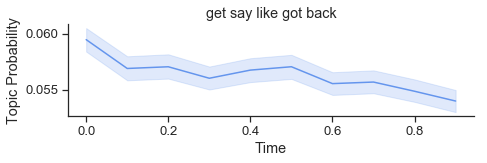

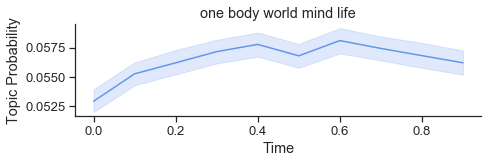

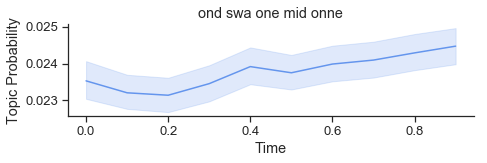

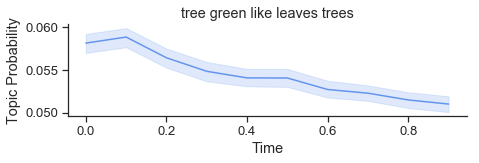

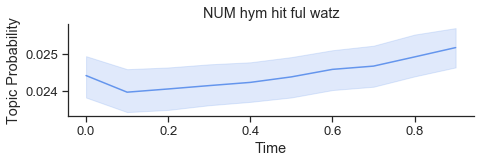

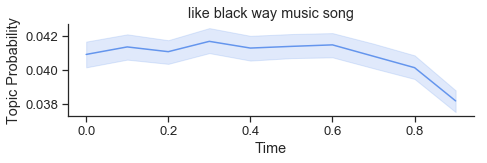

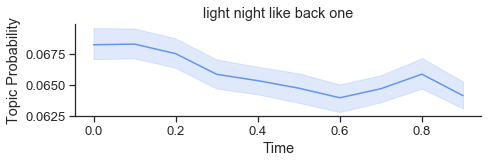

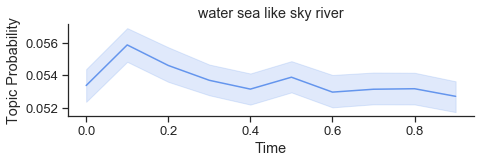

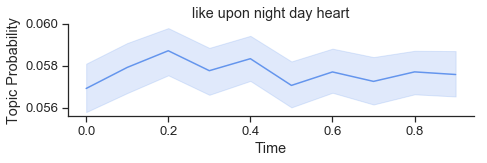

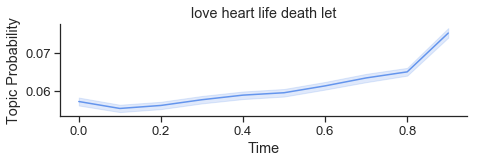

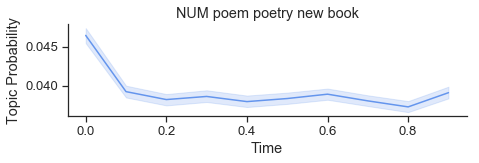

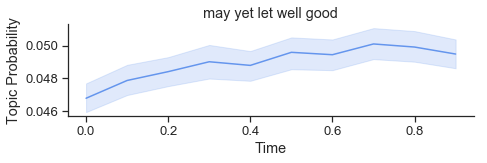

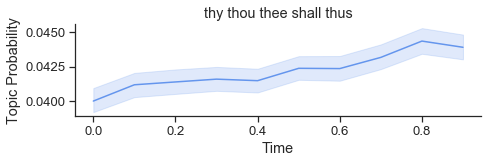

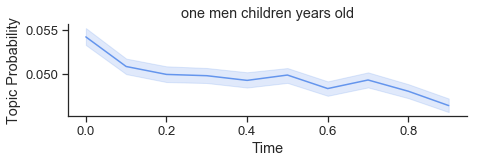

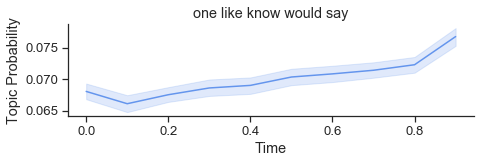

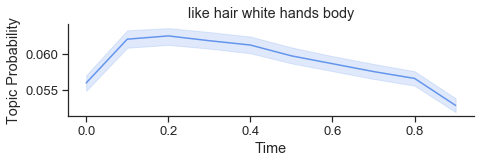

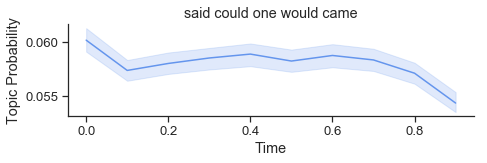

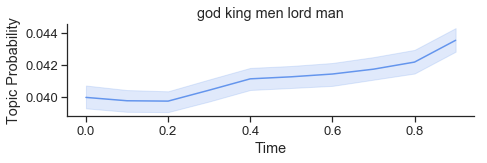

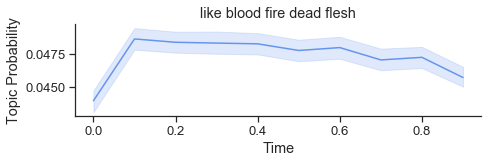

In [21]:
for _topic_index in range(0, len(topics)):
    lmw.plot_topics_over_time(topic_distributions, topics, times, _topic_index)